In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
%pwd

'c:\\Users\\Portable\\OneDrive\\Desktop\\Automated-Stock-Price-Prediction-Pipeline-A-Complete-MLOps-Lifecycle\\research'

In [3]:
os.chdir("../")

In [4]:
%pwd

'c:\\Users\\Portable\\OneDrive\\Desktop\\Automated-Stock-Price-Prediction-Pipeline-A-Complete-MLOps-Lifecycle'

In [5]:
import pandas as pd

In [58]:
data = pd.read_csv(r"data\processed\processed_stock_data.csv")

In [59]:
data

,date,open,high,low,close,volume,close_normalized,SMA_20,EMA_20,close_lag1,close_lag3
0,2024-11-27,228.83,229.19,224.2700,226.92,2995121,2.584790,132.019178,226.920000,132.097824,132.109718
1,2024-11-26,226.73,228.98,225.5115,228.83,4449543,2.636853,132.019178,227.101905,226.920000,132.109718
2,2024-11-25,223.35,226.42,222.6500,226.13,7189260,2.563257,132.019178,227.009342,228.830000,132.109718
3,2024-11-22,223.35,227.20,220.8900,222.97,5320740,2.477122,132.019178,226.624643,226.130000,226.920000
4,2024-11-21,215.81,222.63,215.2701,222.40,5236434,2.461585,132.019178,226.222296,222.970000,228.830000
...,...,...,...,...,...,...,...,...,...,...,...
6305,1999-11-05,92.75,92.94,90.1900,90.25,13737600,-1.140524,100.064500,99.307016,93.940000,97.000000
6306,1999-11-04,94.44,94.44,90.0000,91.56,16697600,-1.104817,99.049000,98.569205,90.250000,93.620000
6307,1999-11-03,95.87,95.94,93.5000,94.37,10369100,-1.028222,98.504000,98.169281,91.560000,93.940000
6308,1999-11-02,96.75,96.81,93.6900,94.81,11105400,-1.016229,98.073500,97.849349,94.370000,90.250000


In [8]:
# Create a new dataframe with only the 'Close column 
close_data = data.filter(['close'])
close_data

,close
0,227.0100
1,226.9100
2,227.2800
3,227.2800
4,227.3300
...,...
13463,208.7765
13464,208.2804
13465,209.0543
13466,209.3420


In [9]:
# Convert the dataframe to a numpy array
dataset = close_data.values

In [10]:
dataset

array([[227.01  ],
       [226.91  ],
       [227.28  ],
       ...,
       [209.0543],
       [209.342 ],
       [210.1953]])

In [29]:
# Get the number of rows to train the model on
training_data_len = len(dataset) - 100
training_data_len

13368

In [31]:
train_data = close_data.tail(training_data_len)

In [32]:
train_data.shape

(13368, 1)

In [33]:
train_data

,close
100,226.1400
101,226.1000
102,226.0400
103,225.9757
104,225.9551
...,...
13463,208.7765
13464,208.2804
13465,209.0543
13466,209.3420


In [34]:
test_data = close_data.head(100)

In [35]:
test_data

,close
0,227.0100
1,226.9100
2,227.2800
3,227.2800
4,227.3300
...,...
95,226.3000
96,226.3300
97,226.1899
98,226.2462


In [13]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.89347793],
       [0.88991532],
       [0.90309698],
       ...,
       [0.25378616],
       [0.2640358 ],
       [0.29443556]])

In [25]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]

In [28]:
len(train_data)

13743

In [50]:
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

In [51]:
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])  # Take 60 consecutive data points
    y_train.append(train_data[i, 0])      # Take the next data point as the target
    if i <= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.67159581, 0.67159581, 0.65223796, 0.65224124, 0.66700242,
       0.65256606, 0.66536193, 0.66569003, 0.60925699, 0.66831482,
       0.66831482, 0.66831482, 0.6729082 , 0.60925699, 0.67159581,
       0.67126771, 0.66831482, 0.67159581, 0.67258011, 0.67159581,
       0.67159581, 0.67159581, 0.6729082 , 0.67159581, 0.66831482,
       0.6729082 , 0.67258011, 0.65847513, 0.66831482, 0.6729082 ,
       0.65847185, 0.6729082 , 0.6729082 , 0.6729082 , 0.6729082 ,
       0.66831482, 0.6729082 , 0.6729082 , 0.67159581, 0.67159581,
       0.67159581, 0.67061151, 0.67093961, 0.65847185, 0.6729082 ,
       0.66700242, 0.66601812, 0.66569003, 0.66601812, 0.65883275,
       0.67093961, 0.65847185, 0.66995531, 0.66569003, 0.66569003,
       0.65847185, 0.65879994, 0.65847185, 0.65847185, 0.65912804])]
[0.6584718458196903]



In [52]:
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [16]:
def splitting_data(input_data, scaler=None):
    dataset = input_data.values
    if scaler is None:
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaled_data = scaler.fit_transform(dataset)
    else:
        scaled_data = scaler.transform(dataset)
    
    x_data = []
    y_data = []
    
    for i in range(60, len(scaled_data)):
        x_data.append(scaled_data[i-60:i, 0])
        y_data.append(scaled_data[i, 0])
    
    x_data, y_data = np.array(x_data), np.array(y_data)
    x_data = np.reshape(x_data, (x_data.shape[0], x_data.shape[1], 1))
    
    return x_data, y_data, scaler

In [36]:
x_train, y_train, scaler = splitting_data(train_data)

In [37]:
x_train.shape

(13308, 60, 1)

In [53]:
x_train.shape

(13683, 60)

LSTM requires the data to be in this format: "(number_of_samples, time_steps, number_of_features)."

The 1 in the last index signifies that there's one feature per time step. 

In [55]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [56]:
x_train.shape

(13683, 60, 1)

In [38]:
# add to it validation
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

13308/13308 [==============================] - 211s 16ms/step - loss: 4.2278e-04


In [45]:
x_test, y_test, scaler = splitting_data(test_data)

# Get the models predicted price values 
predictions = model.predict(x_test)


2/2 [==============================] - 0s 9ms/step


In [46]:
predictions

array([[0.22992069],
       [0.24523756],
       [0.27099347],
       [0.60677147],
       [0.41635126],
       [0.30729175],
       [0.28715244],
       [0.23585987],
       [0.26998395],
       [0.298118  ],
       [0.30748594],
       [0.32097194],
       [0.3566603 ],
       [0.3829615 ],
       [0.353538  ],
       [0.33810243],
       [0.32377404],
       [0.32028326],
       [0.3066488 ],
       [0.28372526],
       [0.26509663],
       [0.25472817],
       [0.25201175],
       [0.24539217],
       [0.23863149],
       [0.23430091],
       [0.21760276],
       [0.1879122 ],
       [0.173186  ],
       [0.16817898],
       [0.1663479 ],
       [0.14555162],
       [0.12033993],
       [0.0958252 ],
       [0.06482869],
       [0.0501128 ],
       [0.06211944],
       [0.07537559],
       [0.05542634],
       [0.04862256]], dtype=float32)

In [47]:
predictions = scaler.inverse_transform(predictions)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

In [48]:
predictions

array([[226.73859],
       [226.77782],
       [226.84375],
       [227.70334],
       [227.21587],
       [226.93666],
       [226.88512],
       [226.75381],
       [226.84116],
       [226.91318],
       [226.93716],
       [226.97168],
       [227.06305],
       [227.13039],
       [227.05505],
       [227.01555],
       [226.97887],
       [226.96992],
       [226.93501],
       [226.87633],
       [226.82866],
       [226.80211],
       [226.79515],
       [226.7782 ],
       [226.7609 ],
       [226.7498 ],
       [226.70708],
       [226.63106],
       [226.59335],
       [226.58055],
       [226.57587],
       [226.52261],
       [226.45807],
       [226.39531],
       [226.31596],
       [226.27827],
       [226.30902],
       [226.34297],
       [226.2919 ],
       [226.27448]], dtype=float32)

In [49]:
y_test_original

array([[226.81  ],
       [226.92  ],
       [228.71  ],
       [226.55  ],
       [226.81  ],
       [226.92  ],
       [226.575 ],
       [226.92  ],
       [226.92  ],
       [226.92  ],
       [227.    ],
       [227.17  ],
       [227.21  ],
       [226.98  ],
       [227.01  ],
       [226.95  ],
       [226.96  ],
       [226.88  ],
       [226.795 ],
       [226.76  ],
       [226.75  ],
       [226.76  ],
       [226.73  ],
       [226.72  ],
       [226.72  ],
       [226.6398],
       [226.53  ],
       [226.54  ],
       [226.54  ],
       [226.54  ],
       [226.43  ],
       [226.365 ],
       [226.3   ],
       [226.19  ],
       [226.2   ],
       [226.3   ],
       [226.33  ],
       [226.1899],
       [226.2462],
       [226.15  ]])

In [50]:
x_test, y_test, scaler = splitting_data(test_data)

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))


# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test_original) ** 2)))
rmse

2/2 [==============================] - 0s 10ms/step


0.37117990025747644

In [53]:
train_data

,close
100,226.1400
101,226.1000
102,226.0400
103,225.9757
104,225.9551
...,...
13463,208.7765
13464,208.2804
13465,209.0543
13466,209.3420


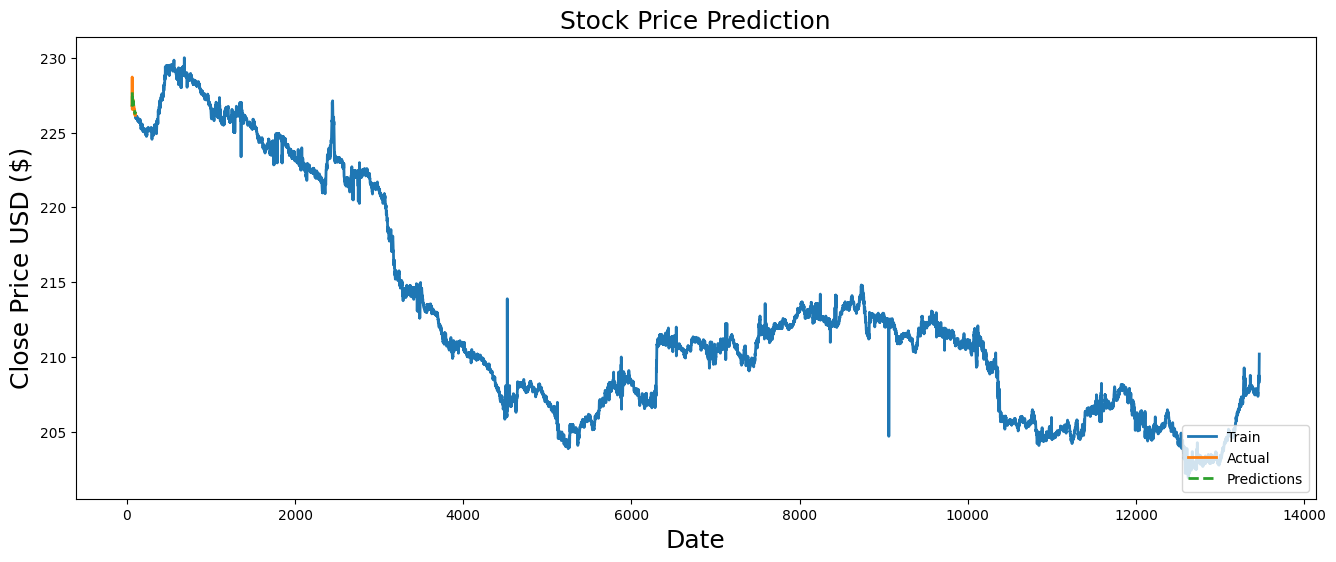

In [52]:
valid = test_data[60:].copy()  # Slice the data to match the length of predictions
valid['Predictions'] = predictions

# Plot the training data and validation data (predictions vs. actuals)
plt.figure(figsize=(16, 6))
plt.title('Stock Price Prediction', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

# Plotting the actual training data
plt.plot(train_data.index, train_data['close'], label='Train', linewidth=2)

# Plotting the actual and predicted values for validation
plt.plot(valid.index, valid['close'], label='Actual', linewidth=2)
plt.plot(valid.index, valid['Predictions'], label='Predictions', linestyle='--', linewidth=2)

# Add legend
plt.legend(loc='lower right')

# Show the plot
plt.show()

In [59]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

13683/13683 [==============================] - 377s 27ms/step - loss: 2.4889e-04


In [60]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

23/23 [==============================] - 2s 36ms/step


0.6978833321540528

C:\Users\Portable\AppData\Local\Temp\ipykernel_2856\2269485014.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


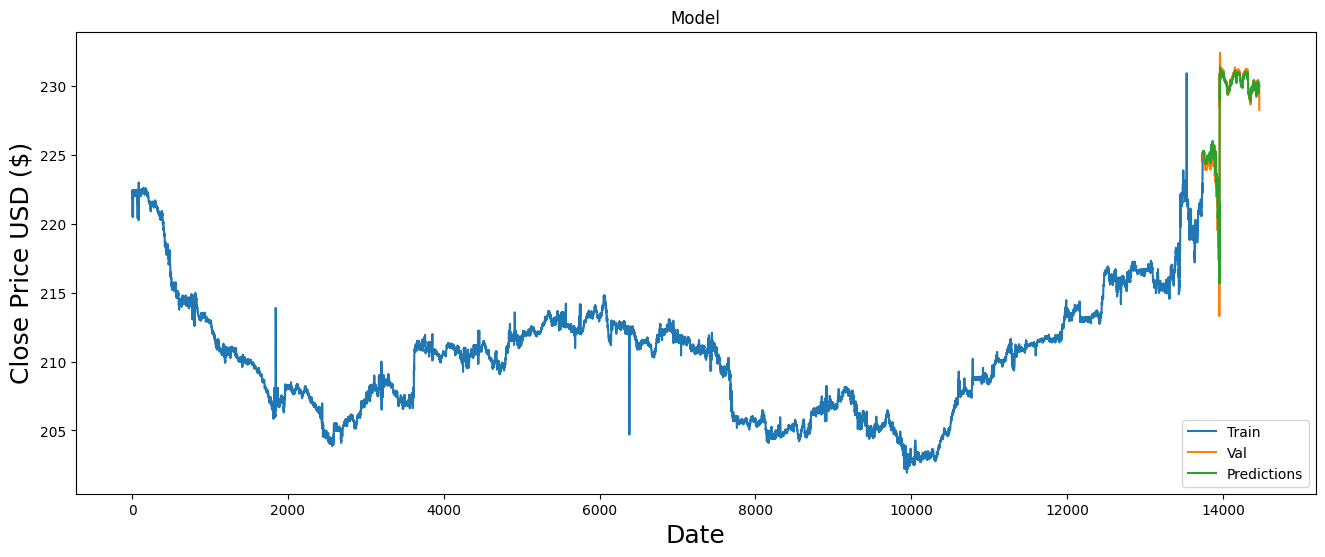

In [65]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [78]:
from pathlib import Path
from dataclasses import dataclass
from src.StockPricePrediction import logger

In [79]:
from src.StockPricePrediction.utils.common import read_yaml, create_directories
from src.StockPricePrediction.constants import *

In [80]:
@dataclass(frozen=True)
class ModelTrainingConfig:
    data_path: Path
    test_size: float
    learning_rate: float
    epochs: int
    batch_size: int
    lstm_units: list
    dense_units: list

In [ ]:
class ModelTraining:
    def __init__(self, config: ModelTrainingConfig):
        self.config = config
        self.scaler = MinMaxScaler(feature_range=(0, 1))
        self.model = None
        
    def build_model(self):
        try:
            model = Sequential()
            # Add LSTM layers
            for units in self.config.lstm_units:
                model.add(LSTM(units, return_sequences=(units != self.config.lstm_units[-1])))
            # Add dense layers
            for units in self.config.dense_units:
                model.add(Dense(units))
            # Compile the model
            model.compile(optimizer='adam', loss='mean_squared_error')
            self.model = model
            logger.info("Model built successfully.")
            return model
        except Exception as e:
            logger.error(f"Error during model building: {e}")
            raise
        return None

In [87]:
class ConfigurationManager:
    def __init__(self, config_filepath: Path):
        self.config = read_yaml(config_filepath)

    def get_model_training_config(self) -> ModelTrainingConfig:
        config = self.config['model_params']

        model_training_config = ModelTrainingConfig(
            data_path=Path(config['data_path']),
            test_size=config['test_size'],
            learning_rate=config['learning_rate'],
            epochs=config['epochs'],
            batch_size=config['batch_size'],
            lstm_units=config['lstm_units'],
            dense_units=config['dense_units'],
        )

        return model_training_config

In [88]:
config_manager = ConfigurationManager(config_filepath=CONFIG_FILE_PATH)  
model_training_config = config_manager.get_model_training_config()

model_training = ModelTraining(config=model_training_config)
model = model_training.build_model()
model

[2024-11-22 20:14:47,723: INFO: common: yaml file: config\config.yaml loaded successfully]
[2024-11-22 20:14:47,757: INFO: 2197671697: Model built successfully.]


In [95]:
config = model.get_config()
config

{'name': 'sequential_3',
 'layers': [{'module': 'keras.layers',
   'class_name': 'LSTM',
   'config': {'name': 'lstm_6',
    'trainable': True,
    'dtype': 'float32',
    'return_sequences': True,
    'return_state': False,
    'go_backwards': False,
    'stateful': False,
    'unroll': False,
    'time_major': False,
    'units': 128,
    'activation': 'tanh',
    'recurrent_activation': 'sigmoid',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'recurrent_initializer': {'module': 'keras.initializers',
     'class_name': 'Orthogonal',
     'config': {'gain': 1.0, 'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'unit_forget_bias': True,
    'kernel_regularizer': None,
    'recurrent_regularizer': None,
    'bias_regul